# Data Analysis of Scraped F1 Champions Data
## Introduction
In a recent project, we successfully scraped the *World Driver's Champions by season* table from Wikipedia.

We can now begin to investigate and draw fun, insightful information after cleaning the data.

While there is no particular goal for this project, we can focus on the factors that enable a driver to become champion.

Below is a brief description of the columns.
### Dataset Description

`Season`: The year of the F1 Championship season

`Driver`: Name of F1 Champion

`Age`: Age of F1 Champion during respective season

`Chassis`: The company who designed the main part of a racing car to which the engine and suspension are attached

`Engine`: The company who designed the engine

`Tyres`: Type of tire(s) used 

`Poles`: Number of top 3 qualifying placements during respective season

`Wins`: Number of wins during respective season

`Podiums`: Number of top 3 finishes during respective season

`Fastest Laps`: Number of fastest laps during respective season
 
`Points`: Number of points accumulated during respective season

`% Points`: Percent of points achieved of the total amount of points available

`Clinched`: The race where the driver mathematically won the championship

`No. of races remaining`: The amount of races remaining when driver clinched championship

`Margin`: The amount of points separating 2nd place

`% Margin`: Points margin as a percentage of champion's total

Let's begin by importing the appropriate libraries for data cleaning, manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in Data
We'll read in the scraped data and assign to the variable `f1`.

In [2]:
f1 = pd.read_csv("f1 champions.csv")

### Data Exploration
As this data was scraped from the web, we should move forward by exploring the dataset for errors that need deleting or correction.

In [3]:
f1.head(10)

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched,# of racesremaining,Margin,% Margin
0,1950,Giuseppe Farina[20],44,Alfa Romeo,Alfa Romeo,P,2.0,3.0,3.0,3.0,30.0,83.333 (47.619),Race 7 of 7,0.0,3,10.000
1,1951,Juan Manuel Fangio[21],40,Alfa Romeo,Alfa Romeo,P,4.0,3.0,5.0,5.0,31.0,86.111 (51.389),Race 8 of 8,0.0,6,19.355
2,1952[a],Alberto Ascari[23],34,Ferrari,Ferrari,F P,5.0,6.0,6.0,6.0,36.0,100.000 (74.306),Race 6 of 8,2.0,12,33.333
3,1953[a],Alberto Ascari[23],35,Ferrari,Ferrari,P,6.0,5.0,5.0,4.0,34.5,95.833 (57.764),Race 8 of 9,1.0,6.5,18.841
4,1954,Juan Manuel Fangio[21],43,Maserati[b],Maserati,P,5.0,6.0,7.0,3.0,42.0,93.333 (70.547),Race 7 of 9,2.0,16.857,40.136
5,Mercedes[b],Mercedes,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955,Juan Manuel Fangio[21],44,Mercedes,Mercedes,C,3.0,4.0,5.0,3.0,40.0,88.889 (65.079),Race 6 of 7,1.0,16.5,41.250
7,1956,Juan Manuel Fangio[21],45,Ferrari,Ferrari,E,6.0,3.0,5.0,4.0,30.0,66.667 (45.833),Race 8 of 8,0.0,3,10.000
8,1957,Juan Manuel Fangio[21],46,Maserati,Maserati,P,4.0,4.0,6.0,2.0,40.0,88.889 (63.889),Race 6 of 8,2.0,15,37.500
9,1958,Mike Hawthorn[24],29,Ferrari,Ferrari,E,4.0,1.0,7.0,5.0,42.0,77.778 (49.495),Race 11 of 11,0.0,1,2.381


In [4]:
f1.tail(10)

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched,# of racesremaining,Margin,% Margin
64,2013,Sebastian Vettel[53],26,Red Bull,Renault,P,9.0,13.0,16.0,7.0,397.0,83.579,Race 16 of 19,3.0,155,39.043
65,2014,Lewis Hamilton[51],29,Mercedes,Mercedes,P,7.0,11.0,16.0,7.0,384.0,76.800,Race 19 of 19,0.0,67,17.448
66,2015,Lewis Hamilton[51],30,Mercedes,Mercedes,P,11.0,10.0,17.0,8.0,381.0,80.211,Race 16 of 19,3.0,59,15.486
67,2016,Nico Rosberg[54],31,Mercedes,Mercedes,P,8.0,9.0,16.0,6.0,385.0,73.333,Race 21 of 21,0.0,5,1.299
68,2017,Lewis Hamilton[51],32,Mercedes,Mercedes,P,11.0,9.0,13.0,7.0,363.0,72.600,Race 18 of 20,2.0,46,12.672
69,2018,Lewis Hamilton[51],33,Mercedes,Mercedes,P,11.0,11.0,17.0,3.0,408.0,77.714,Race 19 of 21,2.0,88,21.569
70,2019,Lewis Hamilton[51],34,Mercedes,Mercedes,P,5.0,11.0,17.0,6.0,413.0,75.641,Race 19 of 21,2.0,87,21.065
71,2020,Lewis Hamilton[51],35,Mercedes,Mercedes,P,10.0,11.0,14.0,6.0,347.0,78.507,Race 14 of 17,3.0,124,35.735
72,2021,Max Verstappen[55],24,Red Bull,Honda,P,10.0,10.0,18.0,6.0,395.5,69.692,Race 22 of 22,0.0,8,2.023
73,2022,Max Verstappen[55],25,Red Bull,RBPT,P,7.0,15.0,17.0,5.0,454.0,76.174,Race 18 of 22,4.0,146,32.159


In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               74 non-null     object 
 1   Driver               74 non-null     object 
 2   Age                  74 non-null     object 
 3   Chassis              73 non-null     object 
 4   Engine               73 non-null     object 
 5   Tyres                73 non-null     object 
 6   Poles                73 non-null     float64
 7   Wins                 73 non-null     float64
 8   Podiums              73 non-null     float64
 9   Fastest laps         73 non-null     float64
 10  Points               73 non-null     float64
 11  % Points             73 non-null     object 
 12  Clinched             73 non-null     object 
 13  # of racesremaining  73 non-null     float64
 14  Margin               73 non-null     object 
 15  % Margin             73 non-null     objec

In [6]:
f1.describe(include="all")

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched,# of racesremaining,Margin,% Margin
count,74,74,74,73,73,73,73.000000,73.000000,73.000000,73.000000,73.000000,73,73,73.000000,73,73
unique,74,35,22,17,13,10,NaN,NaN,NaN,NaN,NaN,72,41,NaN,41,70
top,1950,Lewis Hamilton[51],34,Ferrari,Ferrari,G,NaN,NaN,NaN,NaN,NaN,73.737 (52.778),Race 16 of 16,NaN,1,10.000
freq,1,7,9,15,15,24,NaN,NaN,NaN,NaN,NaN,2,9,NaN,8,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.849315,6.164384,9.835616,3.904110,124.513699,NaN,NaN,1.301370,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.672992,3.064191,3.890921,2.328354,121.904362,NaN,NaN,1.420924,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,3.000000,0.000000,30.000000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,2.000000,50.000000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,10.000000,3.000000,73.000000,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,8.000000,12.000000,6.000000,110.000000,NaN,NaN,2.000000,NaN,NaN


**Observations**
    
    Of the 16 columns, 10 are object dtype and 6 are float type
    Most columns can be converted into numerical data
    Column labels are not in snakecase
    There is one null value for several columns
    Some column entries contain undesirable characters

In [7]:
# We like to create a copy to apply edits before applying to the original
f2 = f1.copy()

### Data Cleaning
**Deleting errors**

Fortunately, `.head()` allowed us to quickly catch the row containing several null values (index 5).

We shall remove this row and reset the index so as to not have a missing index.

In [8]:
f2 = f2.drop([5])
f2.reset_index(drop=True, inplace=True)

**Renaming Columns**

The columns will be modified to follow snake_case syntax and for better readability.

Since we have a small amount of columns, we can do this manually rather than creating or importing functions.

In [9]:
f2.columns = f2.columns.str.lower()
f2.columns

Index(['season', 'driver', 'age', 'chassis', 'engine', 'tyres', 'poles',
       'wins', 'podiums', 'fastest laps', 'points', '% points', 'clinched',
       '# of racesremaining', 'margin', '% margin'],
      dtype='object')

In [10]:
# Characters like % are replaced by 'pct' and spaces replaced with "_"
f2.columns = ['season', 'driver', 'age', 'chassis', 'engine', 'tyres', 'poles',
       'wins', 'podiums', 'fastest_laps', 'points', 'pct_points', 'clinched',
       'remaining_races', 'margin', 'pct_margin']
f2.columns

Index(['season', 'driver', 'age', 'chassis', 'engine', 'tyres', 'poles',
       'wins', 'podiums', 'fastest_laps', 'points', 'pct_points', 'clinched',
       'remaining_races', 'margin', 'pct_margin'],
      dtype='object')

**Cleaning String Columns**

The following do not need typecasting:
    
    driver
    chassis
    engine
    tyres
    clinched
However, Wikipedia attaches references to various data points so one can easily navigate to its respective page to learn more.

Due to this, we extracted those reference numbers and the brackets they were contained in, alongside the text. 

Let us explore and see if there are any other unwanted characters.

In [11]:
str_cols = ["driver", "chassis", "engine", "tyres", "clinched"]

for c in str_cols:
    print(c)
    print(f2[c].value_counts(),
          "\n",
          "_"*30
         )

driver
Lewis Hamilton[51]        7
Michael Schumacher[44]    7
Juan Manuel Fangio[21]    5
Alain Prost[41]           4
Sebastian Vettel[53]      4
Ayrton Senna[42]          3
Niki Lauda[34]            3
Nelson Piquet[39]         3
Jack Brabham[25]          3
Jackie Stewart[31]        3
Mika Häkkinen[48]         2
Fernando Alonso[49]       2
Max Verstappen[55]        2
Emerson Fittipaldi[33]    2
Jim Clark[28]             2
Graham Hill[27]           2
Alberto Ascari[23]        2
Jenson Button[52]         1
Jacques Villeneuve[46]    1
Nico Rosberg[54]          1
Damon Hill[45]            1
Kimi Räikkönen[50]        1
Giuseppe Farina[20]       1
Nigel Mansell[43]         1
Keke Rosberg[40]          1
Jody Scheckter[37]        1
Mario Andretti[36]        1
James Hunt[35]            1
Jochen Rindt[32]          1
Denny Hulme[30]           1
John Surtees[29]          1
Phil Hill[26]             1
Mike Hawthorn[24]         1
Alan Jones[38]            1
Name: driver, dtype: int64 
 ____________

The `driver` column has brackets and undesired numbers, whereas the `chassis` and `clinched` columns have a single unique value with brackets and a character within. 

For the driver column, it is straightforward to remove the undesirables.

**`driver`**

In [12]:
bad_chars = "[]()0123456789"

for c in [*bad_chars]:
    f2["driver"] = f2["driver"].str.replace(c, "", regex = True)

**`clinched`**

From the sport's first season in 1950 til now, the number of races per year has not been standardized.

This indicates a more complex process to draw useful insight from this data. 

Luckily, since the columns `clinched` and `remaining_races` relate to each other, they can both be dropped.

In [13]:
f2.drop(["clinched", "remaining_races"], axis = 1, inplace = True)

**`chassis`**

While we know that only one unique value contains brackets, we cannot apply the same methodology as we did to the `driver` column.

The brackets contain the character `"b"` rather than a number. Replacing that character with a blank space will remove all instances of it from the other data points. 

For now, we will cheat a little and simply find the index and modify it ourselves since this is small dataset.

In [14]:
f2[f2['chassis'] == "Maserati[b]"]

,season,driver,age,chassis,engine,tyres,poles,wins,podiums,fastest_laps,points,pct_points,margin,pct_margin
4,1954,Juan Manuel Fangio,43,Maserati[b],Maserati,P,5.0,6.0,7.0,3.0,42.0,93.333 (70.547),16.857,40.136


In [15]:
f2.loc[4, "chassis"] = "Maserati"

We shall confirm we made the appropriate changes before moving forward with the numeric columns.

In [16]:
str_cols = ["driver", "chassis", "engine", "tyres"]

for c in str_cols:
    print(c)
    print(f2[c].value_counts())
    print("_"*30)

driver
Lewis Hamilton        7
Michael Schumacher    7
Juan Manuel Fangio    5
Alain Prost           4
Sebastian Vettel      4
Ayrton Senna          3
Niki Lauda            3
Nelson Piquet         3
Jack Brabham          3
Jackie Stewart        3
Mika Häkkinen         2
Fernando Alonso       2
Max Verstappen        2
Emerson Fittipaldi    2
Jim Clark             2
Graham Hill           2
Alberto Ascari        2
Jenson Button         1
Jacques Villeneuve    1
Nico Rosberg          1
Damon Hill            1
Kimi Räikkönen        1
Giuseppe Farina       1
Nigel Mansell         1
Keke Rosberg          1
Jody Scheckter        1
Mario Andretti        1
James Hunt            1
Jochen Rindt          1
Denny Hulme           1
John Surtees          1
Phil Hill             1
Mike Hawthorn         1
Alan Jones            1
Name: driver, dtype: int64
______________________________
chassis
Ferrari       15
McLaren       12
Mercedes       8
Williams       7
Lotus          6
Red Bull       6
Brabham  

**Cleaning Numerical String Columns**

The following columns **do** need typecasting:
    
    season
    age
    pct_points
    margin
    pct_margin
    
Similar to before, we will need to remove unwanted characters from these columns before appropriately typecasting.

In [17]:
numb_cols = ['season', 'age','pct_points','margin', 'pct_margin']

bad_chars2 = "[]()abcdefghijklmnopqrstuvwxyz"

for col in numb_cols:
    for char in [*bad_chars2]:
        f2[col] = f2[col].str.replace(char, "", regex = True)

While we could have typecasted all the columns in the loop above, we would like to appropriately typecast certain columns into integer and floats, rather than one for all. 

Moreover, we know that for the column `pct_points`, there were several entries with two values, one being inside parantheses. 

Since we removed the parathenses, we can move forward by taking only the first index after using .split() function.

In [18]:
print("before: ", f2.loc[0,'pct_points'])
f2.loc[0,'pct_points'] = f2.loc[0,'pct_points'].split()[0]
print("after: ", f2.loc[0,'pct_points'])

before:  83.333 47.619
after:  83.333


In [19]:
i = 0
for element in f2['pct_points']:
    f2.loc[i,'pct_points'] = f2.loc[i,'pct_points'].split()[0]
    i += 1

**Converting Numerical String Columns**

We shall convert the columns `points`, `pct_points`, `margin` and `pct_margin` to float type, the remaining numeric columns to integer type and leave the rest as strings. 

In [20]:
int_cols = ['season', 'age','poles','wins', 'podiums', 'fastest_laps']
float_cols = ['points','margin','pct_points', 'pct_margin']

f2[int_cols] = f2[int_cols].astype(int)
f2[float_cols] = f2[float_cols].astype(float)

In [21]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        73 non-null     int32  
 1   driver        73 non-null     object 
 2   age           73 non-null     int32  
 3   chassis       73 non-null     object 
 4   engine        73 non-null     object 
 5   tyres         73 non-null     object 
 6   poles         73 non-null     int32  
 7   wins          73 non-null     int32  
 8   podiums       73 non-null     int32  
 9   fastest_laps  73 non-null     int32  
 10  points        73 non-null     float64
 11  pct_points    73 non-null     float64
 12  margin        73 non-null     float64
 13  pct_margin    73 non-null     float64
dtypes: float64(4), int32(6), object(4)
memory usage: 6.4+ KB


## Data Analysis
### Exploring Drivers
Let's take a look at the drivers who have won a championship by plotting the frequency table returned from `value_counts()`.

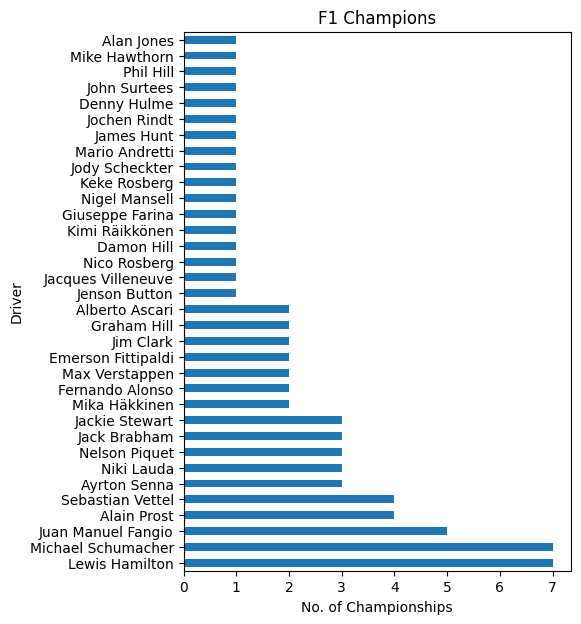

Amount of unique champions:  34


In [22]:
plt.figure(figsize = (5, 7))
f2['driver'].value_counts().plot(kind = "barh")
plt.title("F1 Champions")
plt.xlabel("No. of Championships")
plt.ylabel("Driver")
plt.show()

print("Amount of unique champions: ", f2["driver"].unique().shape[0])

**Observations**

A quick glance at the plot shows there is a tie for the driver with the most championships. Lewis Hamilton and Michael Schumacher each have a whopping 7 titles under their belt, two more than the next contender, Juan Fangio, with 5 titles. 

In the past 72 years from its F1's first season in 1950, there have been 38 years without a "new" champion, considering the amount of unique champions is 34.  

Let's get a better understanding not of the driver, but of the machinery they used to win.

### Exploring Constructors
As previously mentioned in the scraping portion, the `constructors` column was actually split into two, `chassis` and `engine`. 

Let's take a look at how these parts paved the way for their titles.

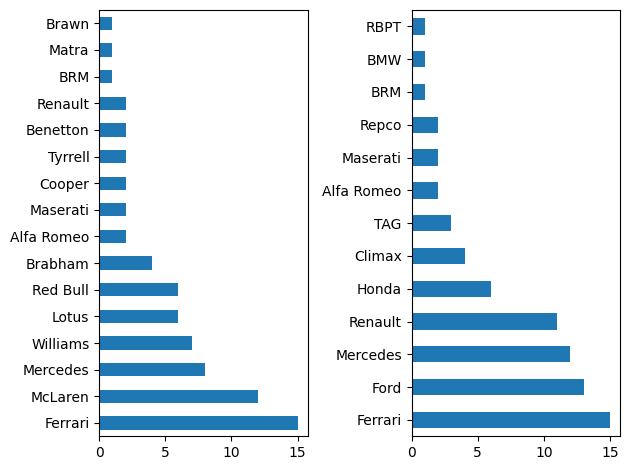

In [28]:
plt.subplot(1,2,1)
f2["chassis"].value_counts().plot(kind = 'barh')

plt.subplot(1,2,2)
f2["engine"].value_counts().plot(kind = 'barh')

plt.tight_layout()
plt.show()

# Conclusion
Insert findings and success of project goal:

Insert future edits: 

Since this project was first conducted, we have learned more about regex when working with strings.

The **Cleaning String Columns** step could be updated to ease the complexity of cleaning.